# Basic usage of MGCAMB

Modified Growth with CAMB (MGCAMB) is a patch for the Einstein Boltzmann solver CAMB that intrdouces phenomenological Modifications of Growth (MG) along with dynamical dark energy. Official repository: https://github.com/sfu-cosmo/MGCAMB.

Since MGCAMB is not fully included in CosmoBolognaLib yet, it is not possible for the moment to set MG parameters using an object of type Cosmology. However, here is a possible workaround to use it.

First, import all CosmoBolognaLib and python modules:

In [1]:
%matplotlib inline
import CosmoBolognaLib as cbl                              
from CosmoBolognaLib import ErrorCBL

import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np

cbl.SetDirs("../../", "./")

Then set an object of class Cosmology (in this case with Planck 2018 parameters):

In [2]:
cosm = cbl.Cosmology(cbl.CosmologicalModel__Planck18_)

Let us see an easy application with CAMB, computing the linear matter power spectrum computed assuming a standard $\Lambda$CDM model:

In [3]:
kk = np.logspace(np.log10(1.e-3), np.log10(1.), 100)
BoltzmannSolver = "CAMB"
doNonLinear = False
redshift = 0.
storeOutput = True

Pk = cosm.Pk_DM(kk, BoltzmannSolver, doNonLinear, redshift, storeOutput)

In this case, CAMB outputs have been stored in CosmoBolognaLib/External/CAMB/output_linear, in a directory named accordingly to the selected cosmological parameters and redshift. The main advantage is that the Bolzmann solver will not be run again when considering the same Cosmology. Indeed, once the power spectrum file has been stored, it will be simply read automatically if you perform again the same analysis, speeding up the computation.

## fR4

Let us now assume to want to compare standard General Relativity with $f(R)$ models (Hu & Sawicki, 2007), fixing in particular the parameter $f_{R0}=-10^{-4}$. 
Now it comes the trick: all the parameters related to MG can be set in the file CosmoBolognaLib/External/MGCAMB/params_MG.ini. 
The parameters to change in the file params_MG.ini are in this case MG_flag and F_R0. The user can modify this parameter manually or using a script like the following. 

First, let us copy the parameter file from the backup version that we prepared (this avoid a lot of troubles):

In [4]:
import fileinput
import os
import shutil

filename = "../../External/MGCAMB/params_MG.ini"
filename_backup = "../../External/MGCAMB/params_MG_backup.ini"

shutil.copy(filename_backup,filename)

'../../External/MGCAMB/params_MG.ini'

Then we modify this file with the characteristic parameters of the cosmological model we are investigating:

In [5]:
text_to_search = ["MG_flag = 0","F_R0 = 0.001d0"]
text_to_replace = ["MG_flag = 3","F_R0 = 0.0001d0"]

for i in range(2):
    with fileinput.FileInput(filename, inplace=True) as file:
        [print(line.replace(text_to_search[i], text_to_replace[i]), end='') for line in file]

With this method we modified the default strings MG_flag = 0 and F_R0 = 0.01d0 to MG_flag = 3 and F_R0 = 0.0001d0.

Let us compute again the total matter power spectrum, using this time MGCAMB (prepared for $f(R)$ MG):

In [6]:
BoltzmannSolver = "MGCAMB"
cosmologyTag = "fR4"

Pk_fR4 = cosm.Pk_DM(kk, BoltzmannSolver, doNonLinear, redshift, storeOutput, cosmologyTag)

Please notice that in this case we decided to add a tag to the name of the stored files. This is because the MG parameters are not considered during the storing of the output files. Therefore two power spectra computed with the same cosmological parameters except, for instance, $f_{R0}$, will not be distinguished unless the user provides a string (different from the default "test") to differentiate the MG models. Another "safe" option is to remove the output files once computed the power spectrum setting storeOutput = False. This is discouraged if you plan to run the code several times but can can help you avoid reading the wrong output file accidentally (trust me...).

## fR5

Let us suppose now to repeat the computation for $f_{R0}=-10^{-5}$. We take again the file params_MG.ini from the backup version and change the strings we are interested in. Then we compute again the power spectrum, storing the output with a different tag.

In [7]:
shutil.copy(filename_backup,filename)

text_to_search = ["MG_flag = 0","F_R0 = 0.001d0"]
text_to_replace = ["MG_flag = 3","F_R0 = 0.00001d0"]

for i in range(2):
    with fileinput.FileInput(filename, inplace=True) as file:
        [print(line.replace(text_to_search[i], text_to_replace[i]), end='') for line in file]

cosmologyTag = "fR5"

Pk_fR5 = cosm.Pk_DM(kk, BoltzmannSolver, doNonLinear, redshift, storeOutput, cosmologyTag)

## Plotting

Let us now visualise the power spectra computed with General Relativity (CAMB) and with a $f(R)$ model (MGCAMB):

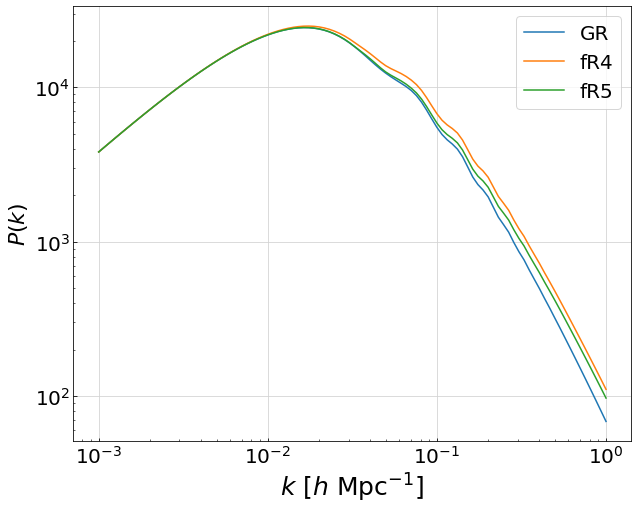

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(kk, Pk, label="GR")
ax.plot(kk, Pk_fR4, label="fR4")
ax.plot(kk, Pk_fR5, label="fR5")

ax.legend(loc='best', fontsize=20)
ax.grid(zorder=0, color='lightgray')
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax.set_xlabel("$k \ [h \ \mathrm{Mpc}^{-1}]$", fontsize=25)
ax.set_ylabel("$P(k)$", fontsize=22)
ax.set_yscale('log')
ax.set_xscale('log')

## Mass function

As we got this far we let us see another application! If you played the game correctly you can now compute, for instance, the halo mass function without running again the Boltzmann solver: just remember the tag you used to compute the power spectra and CosmoBolognaLib will read them automatically for you :D

In [9]:
MM = np.logspace(12, 16, 100)

model_MF = "Tinker"
MF = [cosm.mass_function(MM[i], redshift, model_MF, "CAMB", storeOutput) for i in range(len(MM))]
MF_fR4 = [cosm.mass_function(MM[i], redshift, model_MF, "MGCAMB", storeOutput, "fR4") for i in range(len(MM))]
MF_fR5 = [cosm.mass_function(MM[i], redshift, model_MF, "MGCAMB", storeOutput, "fR5") for i in range(len(MM))]

Let us enjoy another plot...

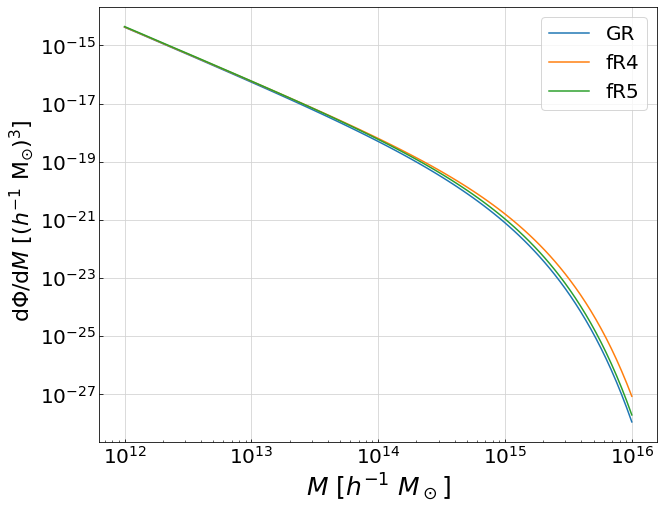

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(MM, MF, label="GR")
ax.plot(MM, MF_fR4, label="fR4")
ax.plot(MM, MF_fR5, label="fR5")

ax.legend(loc='best', fontsize=20)
ax.grid(zorder=0, color='lightgray')
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax.set_xlabel("$M \ [h^{-1} \ M_\odot]$", fontsize=25)
ax.set_ylabel("$\ \mathrm{d}\Phi/\mathrm{d}M\\ [(h^{-1} \ \mathrm{M_{\odot}})^3]$", fontsize=22)
ax.set_xscale('log')
ax.set_yscale('log')

Now you should be able to use MGCAMB as you prefer... have fun!!